In [1]:
#Q1 Identify missing or incorrect data in the dataset and apply appropriate preprocessing steps to clean it (code and explanation)


import pandas as pd

data = pd.read_csv('dataset.csv')

print("Missing Data Before Cleaning:\n", data.isnull().sum())

num_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

cat_cols = ['sex']

for col in num_cols:
    data[col] = data[col].fillna(data[col].median())
    
for col in cat_cols:
    data[col] = data[col].fillna(data[col].mode()[0])
    
Q1 = data['bill_length_mm'].quantile(0.25)
Q3 = data['bill_length_mm'].quantile(0.75)
IQR = Q3 - Q1

outliers = data[(data['bill_length_mm'] < (Q1 - 1.5 * IQR)) | (data['bill_length_mm'] > (Q3 + 1.5 * IQR))]
print("Outliers Detected in bill_length_mm:\n", outliers)

data = data[~data['bill_length_mm'].isin(outliers['bill_length_mm'])]
incorrect_data = data[data['body_mass_g'] < 0]
print("Incorrect Data in body_mass_g:\n", incorrect_data)

data = data[data['body_mass_g'] >= 0]  
duplicates = data.duplicated().sum()
print(f"Number of Duplicated Rows: {duplicates}")
data = data.drop_duplicates() 
print("Missing Data After Cleaning:\n", data.isnull().sum())
data.to_csv('cleaned_dataset.csv', index=False)

#EXPLANATION
# Handling Missing Data: Identify missing data and fill the missing values accordingly: with median for numerical columns and with mode for categorical columns.
# Handling Incorrect Data:Identify and handle outliers with the help of IQR.
# Clean negative unrealistic values from numerical columns.
# Remove duplicate rows to avoid duplication in the dataset
# Final Step:Save the cleaned dataset into a new file.

Missing Data Before Cleaning:
 species               0
island                0
bill_length_mm        7
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  16
dtype: int64
Outliers Detected in bill_length_mm:
 Empty DataFrame
Columns: [species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: []
Incorrect Data in body_mass_g:
 Empty DataFrame
Columns: [species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: []
Number of Duplicated Rows: 0
Missing Data After Cleaning:
 species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [2]:
#Q2 What is the average body_mass_g for Gentoo penguins? (code)
import pandas as pd
data = pd.read_csv('dataset.csv')
gentoo_penguins = data[data['species'] == 'Gentoo']
average_body_mass = gentoo_penguins['body_mass_g'].mean()
print(f"The average body_mass_g for Gentoo penguins is: {average_body_mass}")



The average body_mass_g for Gentoo penguins is: 5133.739837398374


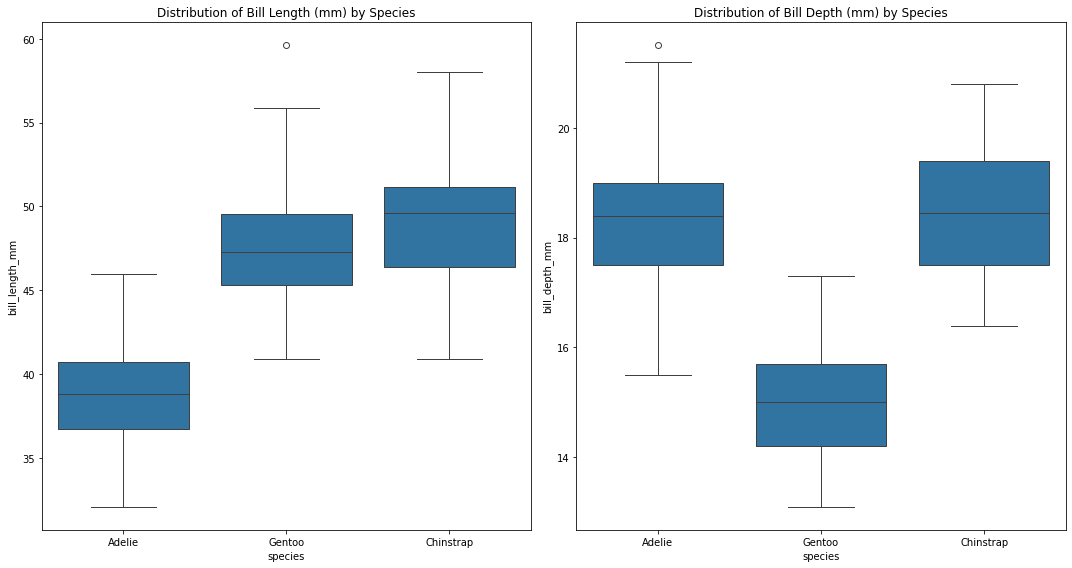


Adelie Penguin:
  Bill Length (mm) - Skewness: nan, Kurtosis: nan
  Bill Depth (mm) - Skewness: nan, Kurtosis: nan

Gentoo Penguin:
  Bill Length (mm) - Skewness: nan, Kurtosis: nan
  Bill Depth (mm) - Skewness: nan, Kurtosis: nan

Chinstrap Penguin:
  Bill Length (mm) - Skewness: nan, Kurtosis: nan
  Bill Depth (mm) - Skewness: 0.01, Kurtosis: -0.90


In [3]:
#Q3 Q3: How do the distributions of bill_length_mm and bill_depth_mm differ between the three penguin species? Analyze the skewness and kurtosis of each feature for different species. (code and explanation)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

data = pd.read_csv('dataset.csv')

plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
sns.boxplot(x='species', y='bill_length_mm', data=data)
plt.title('Distribution of Bill Length (mm) by Species')

plt.subplot(1, 2, 2)
sns.boxplot(x='species', y='bill_depth_mm', data=data)
plt.title('Distribution of Bill Depth (mm) by Species')

plt.tight_layout()
plt.show()

for species in data['species'].unique():
    species_data = data[data['species'] == species]
    
    bill_length_skew = skew(species_data['bill_length_mm'])
    bill_length_kurt = kurtosis(species_data['bill_length_mm'])
    
    bill_depth_skew = skew(species_data['bill_depth_mm'])
    bill_depth_kurt = kurtosis(species_data['bill_depth_mm'])
    
    print(f"\n{species} Penguin:")
    print(f"  Bill Length (mm) - Skewness: {bill_length_skew:.2f}, Kurtosis: {bill_length_kurt:.2f}")
    print(f"  Bill Depth (mm) - Skewness: {bill_depth_skew:.2f}, Kurtosis: {bill_depth_kurt:.2f}")
    
    #EXPLANATION
# To see how the distributions of `bill_length_mm` and `bill_depth_mm` differ for these three penguin species, we execute the following:

# 1.Visualizing the Distributions:
#  We create box plots showing the distributions of `bill_length_mm` and `bill_depth_mm` in the three penguin species: `Adelie`, `Chinstrap`, and `Gentoo`.
#  A box plot helps identify the central tendency(median), the spread of the data (IQR or interquartile range), and possible outliers.
#  By comparing the box plots for each species, we are able to note if the distributions for `bill_length_mm` and `bill_depth_mm` are different in spread, central value, and existence of outliers.

# 2. Skewness:
# Skewness describes the asymmetry of the distribution. A positive skew would indicate that the right tail was longer or fatter; on the other hand, in the case of a negative skew, the left tail was longer or fatter.
# For each species, we compute the skewness for both `bill_length_mm` and `bill_depth_mm` for each species to understand how they skew.
# If skewness is near to 0, then the distribution is symmetrical. Greater than 0 means it has the right skew (right end longer), and less than 0 means it has left skew (left end is longer).

# 3. Kurtosis:
# Kurtosis is the measure for tailedness, or how much of its data falls in the tail regions relative to a standard normal distribution.
# A positive kurtosis(leptokurtic distribution) means the data points are more concentrated in the tails; a negative kurtosis (platykurtic distribution) means that the distribution has lighter tails.
# For each species, we calculate the kurtosis of both features to check whether the distributions are more concentrated around the mean (low kurtosis) or have more extreme outliers (high kurtosis).

# 4. Results Interpretation:
# Skewness describes how asymmetric the data is and in what direction (left or right-skewed).
# Kurtosis addresses how the data is centered within the tails of the distribution; it indicates whether extreme data points are far off from a normal distribution.
# The box plots graphically display the quantitative findings of skewness and kurtosis, such as whether one species measurement distribution is spread out compared to another or whether a measurement distribution of one species shows greater or lesser central tendency or more extreme outliers.
# Summary Points:
# Boxplots: Demonstrates the shape and dispersion of data for each species.
# Skewness: Represents how left or right-skewed a distribution is.
#Kurtosis: Indicates whether there are outliers and the extent to which data is concentrated in the tails.


Outliers detected in bill_length_mm:
 Empty DataFrame
Columns: [species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: []
Outliers detected in bill_depth_mm:
 Empty DataFrame
Columns: [species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: []
Outliers detected in flipper_length_mm:
 Empty DataFrame
Columns: [species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: []
Outliers detected in body_mass_g:
        species     island  bill_length_mm  bill_depth_mm  flipper_length_mm   
73      Adelie  Torgersen            45.8           18.9              197.0  \
206     Gentoo     Biscoe            46.5           14.4              217.0   
324  Chinstrap      Dream            51.5           18.7              187.0   

     body_mass_g     sex  
73       15000.0    male  
206      12000.0  female  
324      10000.0    male  


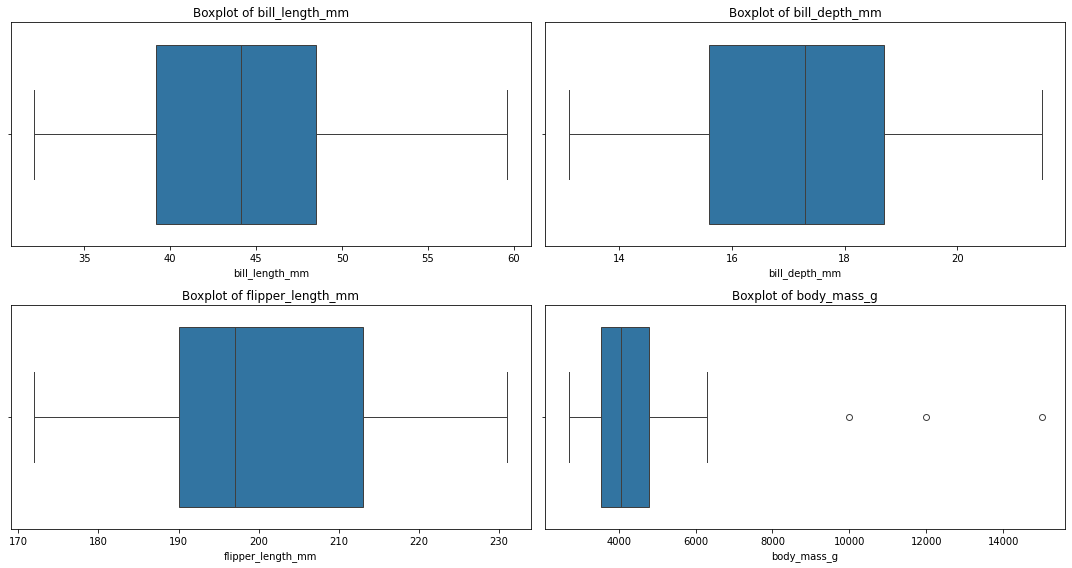

In [4]:
#Q4 Identify which features in the dataset have outliers. Provide the method used to detect them and visualize the outliers. (code and explanation)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('dataset.csv')

num_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

plt.figure(figsize=(15, 8))

for i, col in enumerate(num_cols, 1):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f"Outliers detected in {col}:\n", outliers)
    
    plt.subplot(2, 2, i)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    
plt.tight_layout()
plt.show()
#EXPLANATION
# Outlier Detection using the IQR Method: Explanation

# The IQR method is the most commonly used technique to identify outliers in numerical data. This method works by measuring the spread of the middle 50% of the data and finds out points that lie outside of a typical range.
# 1. Calculation of Quartiles (Q1 and Q3):
# Q1 (25th percentile) : This is the value below which 25% of the data points fall.
# Q3 (75th percentile) : This is the value below which 75% of the data points fall.
# These quartiles partition the data into four sections, making it easier for us to understand the distribution of the data.

# 2. Compute IQR:
# The IQR is the difference between the third quartile (Q3) and the first quartile (Q1):
# IQR=Q3−Q1
#It measures the spread of the central 50% of the data. The greater the IQR, the more spread the data.
  
# 3. Determine Outlier Thresholds:
# Outliers are those values that are positioned more than a certain distance away from Q1 and Q3. Using the IQR, the bounds for outlies are set as:
#Lower bound: Q1 – 1.5 × IQR
#Upper bound: Q3 + 1.5 × IQR
# Outliers are any data points below the lower bound or above the upper bound.

# 4.Visualizing Outliers with Box Plots:
# Box plots are graphical representations of data distribution. They show the median and the interquartile range (IQR), as well as possible outliers. Outliers are frequently indicated as individual data points that extend beyond the "whiskers" of the plot.
# The box plot provides an easy method of identifying if there are data points lying far away from the central data (potential outliers).


# The IQR method is particularly helpful because it focuses on spread of data, making it less sensitive to extreme values (such as the mean) and more centered distribution.
# It often is used in cases of data which could be erroneous. For example, wrong measures or errors in inputting; it also identifies rare or extreme values that may of interest to be further investigated.
# The IQR method is a simple and robust technique for the detection of outliers in numerical data. Since it focuses on the middle 50% of the data, it identifies values that are unusually far from the rest of the data. Box plots are effective ways to represent the results and spot outliers easily.


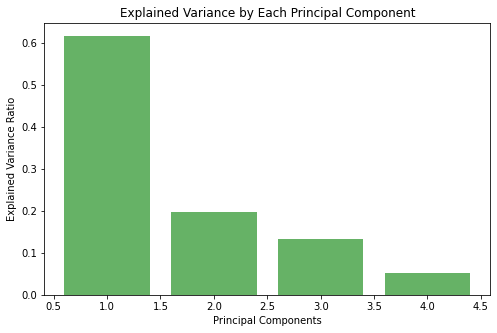

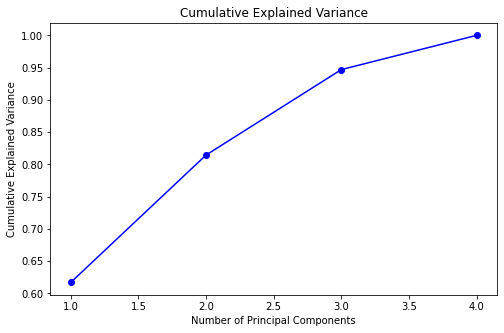

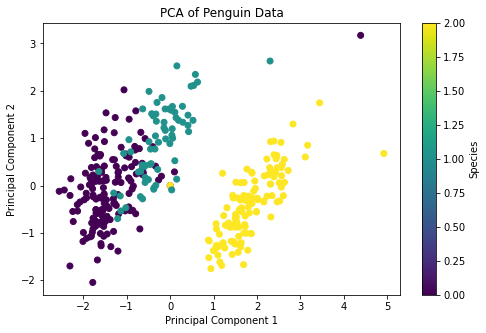

In [5]:
#Q5 Does this dataset contribute to the curse of dimensionality? If yes perform PCA. (code and explanation required)
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

data = pd.read_csv('dataset.csv')

num_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']


data[num_cols] = data[num_cols].fillna(data[num_cols].mean())

X = data[num_cols].apply(pd.to_numeric, errors='coerce')

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.6, color='g')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Each Principal Component')
plt.show()

cumulative_variance = np.cumsum(explained_variance)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.show()

pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(8, 5))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=data['species'].astype('category').cat.codes, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Penguin Data')
plt.colorbar(label='Species')
plt.show()

# EXPLANATION
# Imputation of Missing Values: Missing values in the numerical columns are replaced with the mean of the respective columns.
# Standardization: The dataset is scaled so that all features have a mean of 0 and standard deviation of 1.
# PCA Application: PCA is performed on the standardized data to transform it into principal components.
# Explained Variance: The explained variance ratio shows the contribution of each principal component.
# Dimensionality Reduction: The data is reduced to two dimensions for easy visualization.
# Visualization: The reduced data is visualized in a 2D scatter plot to explore patterns and clusters.


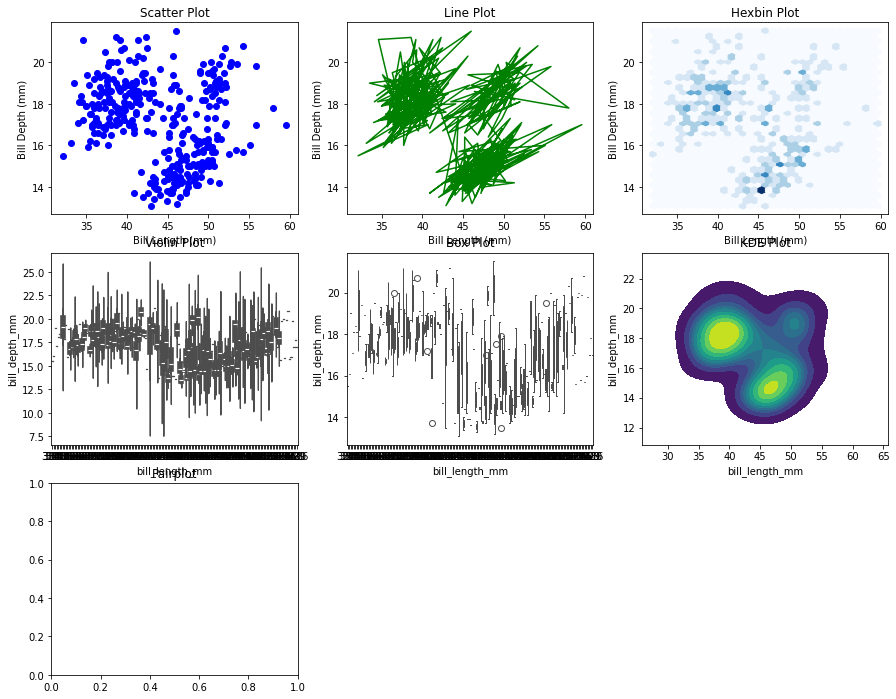

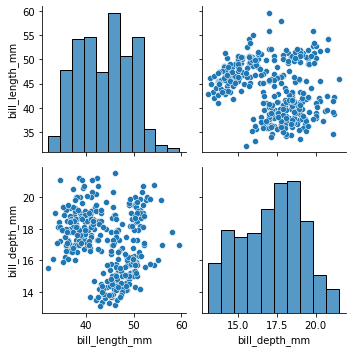

In [6]:
#Q6 Q6: Use bill_length_mm vs bill_depth_mm and plot 7 different graphs to visualize them. (code)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('dataset.csv')


if 'bill_length_mm' not in data.columns or 'bill_depth_mm' not in data.columns:
    print("Required columns not found in the dataset.")
else:
   
    x = data['bill_length_mm']
    y = data['bill_depth_mm']
    
  
    fig, axes = plt.subplots(3, 3, figsize=(15, 12))

    # 1. Scatter plot
    axes[0, 0].scatter(x, y, color='blue')
    axes[0, 0].set_xlabel('Bill Length (mm)')
    axes[0, 0].set_ylabel('Bill Depth (mm)')
    axes[0, 0].set_title('Scatter Plot')

    # 2. Line plot
    axes[0, 1].plot(x, y, color='green')
    axes[0, 1].set_xlabel('Bill Length (mm)')
    axes[0, 1].set_ylabel('Bill Depth (mm)')
    axes[0, 1].set_title('Line Plot')

    # 3. Hexbin plot
    axes[0, 2].hexbin(x, y, gridsize=30, cmap='Blues')
    axes[0, 2].set_xlabel('Bill Length (mm)')
    axes[0, 2].set_ylabel('Bill Depth (mm)')
    axes[0, 2].set_title('Hexbin Plot')

    # 4. Violin plot
    sns.violinplot(x=x, y=y, ax=axes[1, 0], color='cyan')
    axes[1, 0].set_title('Violin Plot')

    # 5. Box plot
    sns.boxplot(x=x, y=y, ax=axes[1, 1], color='magenta')
    axes[1, 1].set_title('Box Plot')

    # 6. KDE (Kernel Density Estimate) plot
    sns.kdeplot(x=x, y=y, ax=axes[1, 2], cmap='viridis', fill=True)
    axes[1, 2].set_title('KDE Plot')

    # 7. Pairplot (without hue, to avoid issues with missing species data)
    sns.pairplot(data[['bill_length_mm', 'bill_depth_mm']])
    axes[2, 0].set_title('Pairplot')

    # Remove the empty subplots
    fig.delaxes(axes[2, 1])
    fig.delaxes(axes[2, 2])

    # Adjust layout
    plt.tight_layout()
    plt.show()


In [7]:
#Q7  Find the maximum flipper_length_mm for each combination of species and island. Which species has the longest flippers on each island? (code)
import pandas as pd

data = pd.read_csv('dataset.csv')

max_flipper = data.groupby(['species', 'island'])['flipper_length_mm'].max().reset_index()

longest_flippers = max_flipper.loc[max_flipper.groupby('island')['flipper_length_mm'].idxmax()]

print(longest_flippers)


     species     island  flipper_length_mm
4     Gentoo     Biscoe              231.0
3  Chinstrap      Dream              212.0
2     Adelie  Torgersen              210.0


In [8]:
#Q8 Perform z-score normalization on this dataset. (code)
import pandas as pd
from scipy.stats import zscore

data = pd.read_csv('dataset.csv')

numerical_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())

data[numerical_cols] = data[numerical_cols].apply(zscore)

print(data)


       species     island  bill_length_mm  bill_depth_mm  flipper_length_mm   
0       Adelie  Torgersen       -0.882230       0.787743          -1.422488  \
1       Adelie  Torgersen       -0.808355       0.126556          -1.065352   
2       Adelie  Torgersen       -0.660604       0.431719          -0.422507   
3       Adelie  Torgersen        0.000000       0.000000           0.000000   
4       Adelie  Torgersen       -1.325483       1.092905          -0.565361   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream        2.202069       1.347208           0.434620   
340  Chinstrap      Dream       -0.069601       0.482580           0.077484   
341  Chinstrap      Dream        1.056999       0.533440          -0.565361   
342  Chinstrap      Dream        1.278626       0.940324           0.648902   
343  Chinstrap      Dream        1.167813       0.787743          -0.208225   

     body_mass_g      sex  
0      -0.470213     ma